# DEPTH+: An Enhanced Depth Metric for Wikipedia Corpora Quality

## # Definitions of All Wikipedia Depth Metrics (Depth & DEPTH+):

In [1]:
import ssl, warnings, pandas as pd
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
pd.options.display.float_format = '{:.2f}'.format
ssl._create_default_https_context = ssl._create_unverified_context


def get_wiki_depths(bots=True):
    url = r'https://en.wikipedia.org/wiki/List_of_Wikipedias'
    tables = pd.read_html(url)
    dataframe = tables[4] 
    dataframe = dataframe[['Language','Wiki','Articles', 'Total pages', 'Edits', 'Admins', 'Users', 'Active users']]
    dataframe = dataframe.rename(columns={"Total pages": "Total_Pages", "Active users": "Active_Users"})

    dataframe['Non_Articles'] = dataframe['Total_Pages'] - dataframe['Articles']
    
    if bots==False: # `False` means remove all bot activities 
        botArticles = pd.read_csv('botArticles.csv')

        dataframe['Articles'] = dataframe['Articles'] - botArticles['botArticles']
        dataframe['Total_Pages'] = dataframe['Articles'] + dataframe['Non_Articles']

        botEdits = pd.read_csv('botEdits.csv')
        dataframe['Edits'] = dataframe['Edits'] - botEdits['botEdits']
        
    dataframe = dataframe[['Language','Wiki','Total_Pages', 'Articles', 'Non_Articles', 'Edits', 'Admins', 'Users', 'Active_Users']]

    dataframe = dataframe[dataframe["Language"].str.contains("(closed)") == False]

    return dataframe 



def compute_depth(dataframe):
    dataframe['Depth'] = (dataframe['Edits']/dataframe['Articles']) * (dataframe['Non_Articles']/dataframe['Articles']) * \
                            (1- dataframe['Articles']/dataframe['Total_Pages'])                    
    return dataframe


def compute_depth_simple(dataframe):
    dataframe['Depth_simple'] = (dataframe['Edits']/dataframe['Total_Pages']) * (dataframe['Non_Articles']/dataframe['Articles'])**2
    return dataframe


def compute_depth_plus(dataframe):
    dataframe['Depth+'] = (dataframe['Admins']) * (dataframe['Active_Users']/dataframe['Users']) * \
                            ((dataframe['Edits']*dataframe['Non_Articles'])/dataframe['Articles']**2) * \
                                ((dataframe['Articles']/dataframe['Total_Pages']))              
    return dataframe 


def compute_depth_plus_simple(dataframe):
    dataframe['Depth+_simple'] = (dataframe['Admins']) * (dataframe['Active_Users']/dataframe['Users']) * \
                            (dataframe['Edits']/dataframe['Total_Pages']) * (dataframe['Non_Articles']/dataframe['Articles'])
    return dataframe

## # Calculations of All Wikipedia Depth Metrics:

### @ Calculations of All Depth Metrics (Depth & DEPTH+) *--with bot activities*:

In [2]:
depth = get_wiki_depths()
depth = compute_depth(depth)
depth = compute_depth_simple(depth)
depth = compute_depth_plus(depth)
depth = compute_depth_plus_simple(depth)


depth.to_csv('depth.csv',index=False)


depth = depth.sort_values(by='Depth', ascending=False)
depth.to_csv('depth_ordered.csv',index=False)
# depth = depth.sort_values(by='Depth+', ascending=False)



depth.head(10)

,Language,Wiki,Total_Pages,Articles,Non_Articles,Edits,Admins,Users,Active_Users,Depth,Depth_simple,Depth+,Depth+_simple
319,Cree,cr,2188,161,2027,38220,2,17790,16,2768.85,2768.85,0.40,0.40
316,Greenlandic,kl,2265,242,2023,74746,3,12796,12,2306.11,2306.11,0.78,0.78
0,English,en,57941923,6642196,51299727,1144555884,908,45353848,127885,1178.29,1178.29,390.61,390.61
317,Dzongkha,dz,2621,237,2384,30174,1,9788,13,1164.88,1164.88,0.15,0.15
233,Ripuarian,ksh,10584,2940,7644,1607356,3,22054,17,1026.62,1026.62,0.91,0.91
315,Tigrinya,ti,2770,256,2514,24152,2,8957,10,840.86,840.86,0.19,0.19
30,Serbo-Croatian,sh,4647542,457985,4189557,41404769,8,184125,201,745.52,745.52,0.71,0.71
13,Vietnamese,vi,19415111,1282386,18132725,69812540,19,905163,2010,718.92,718.92,2.15,2.15
174,Bihari (Bhojpuri),bh,72204,8311,63893,744087,2,31956,59,609.06,609.06,0.29,0.29
310,Inuktitut,iu,3012,449,2563,46139,2,18216,32,499.13,499.13,0.31,0.31


### @ Calculations of All Depth Metrics (Depth & DEPTH+) *--without bot activities*:

In [3]:
depth_noBots = get_wiki_depths(bots=False)
depth_noBots = compute_depth(depth_noBots)
depth_noBots = compute_depth_simple(depth_noBots)
depth_noBots = compute_depth_plus(depth_noBots)
depth_noBots = compute_depth_plus_simple(depth_noBots)

depth_noBots.to_csv('depth_noBots.csv',index=False)

# depth_noBots = depth_noBots.sort_values(by='Depth', ascending=False)
# depth_noBots = depth_noBots.sort_values(by='Depth+', ascending=False)

depth_noBots.head(10)

,Language,Wiki,Total_Pages,Articles,Non_Articles,Edits,Admins,Users,Active_Users,Depth,Depth_simple,Depth+,Depth+_simple
0,English,en,57774560.00,6474833.00,51299727,1073100425.00,908,45353848,127885,1165.94,1165.94,376.77,376.77
1,Cebuano,ceb,5126730.00,24181.00,5102549,2077786.00,5,101552,152,18046.22,18046.22,0.64,0.64
2,German,de,7700162.00,2788713.00,4911449,217932954.00,182,4125247,18482,87.79,87.79,40.64,40.64
3,Swedish,sv,4418400.00,816138.00,3602262,34953228.00,67,861536,2269,154.12,154.12,6.16,6.16
4,French,fr,12433858.00,2435247.00,9998611,179725128.00,152,4630168,18937,243.67,243.67,36.89,36.89
5,Dutch,nl,3677266.00,1271421.00,2405845,48762641.00,35,1269369,3916,47.48,47.48,2.71,2.71
6,Russian,ru,7500192.00,1756980.00,5743212,113883394.00,75,3366824,11078,162.24,162.24,12.25,12.25
7,Spanish,es,7879153.00,1851169.00,6027984,130824587.00,60,6813944,14497,176.06,176.06,6.90,6.90
8,Italian,it,7574822.00,1690905.00,5883917,105681711.00,120,2369464,8316,168.94,168.94,20.45,20.45
9,Egyptian Arabic,arz,2066585.00,1617231.00,449354,3560563.00,7,207355,202,0.13,0.13,0.00,0.00


### @ Calculation of Global Rank of All Wikipedia Editions *--with/without bot activities*:

In [4]:
# global_rank.csv
global_rank = depth[['Language', 'Wiki', 'Articles']]
global_rank = global_rank.sort_values(by='Articles', ascending=False)
global_rank.to_csv('global_rank.csv',index=False)
print(global_rank)

# global_rank_noBots.csv
global_rank_noBots = depth_noBots[['Language', 'Wiki', 'Articles']]
global_rank_noBots = global_rank_noBots.sort_values(by='Articles', ascending=False)
global_rank_noBots.to_csv('global_rank_noBots.csv',index=False)
print(global_rank_noBots)

        Language Wiki  Articles
0        English   en   6642196
1        Cebuano  ceb   6123587
2         German   de   2790340
3        Swedish   sv   2561243
4         French   fr   2512610
..           ...  ...       ...
315     Tigrinya   ti       256
316  Greenlandic   kl       242
317     Dzongkha   dz       237
318       Frafra  gur       216
319         Cree   cr       161

[320 rows x 3 columns]
        Language Wiki   Articles
0        English   en 6474833.00
2         German   de 2788713.00
4         French   fr 2435247.00
7        Spanish   es 1851169.00
6        Russian   ru 1756980.00
..           ...  ...        ...
316  Greenlandic   kl     242.00
317     Dzongkha   dz     237.00
318       Frafra  gur     216.00
319         Cree   cr     161.00
241         Pali   pi      16.00

[320 rows x 3 columns]


### @ Calculations of Depth Metric for All Wikipedia Editions *--with/without bot activities*:

In [5]:
# all_depth.csv
all_depth = depth[['Language', 'Wiki', 'Depth']]
all_depth = all_depth.sort_values(by='Depth', ascending=False)
all_depth.to_csv('all_depth.csv',index=False)
print(all_depth)

# all_depth_noBots.csv
all_depth_noBots = depth_noBots[['Language', 'Wiki', 'Depth']]
all_depth_noBots = all_depth_noBots.sort_values(by='Depth', ascending=False)
all_depth_noBots.to_csv('all_depth_noBots.csv',index=False)
print(all_depth_noBots)

            Language Wiki   Depth
319             Cree   cr 2768.85
316      Greenlandic   kl 2306.11
0            English   en 1178.29
317         Dzongkha   dz 1164.88
233        Ripuarian  ksh 1026.62
..               ...  ...     ...
9    Egyptian Arabic  arz    0.30
95          Silesian  szl    0.29
114           Kotava  avk    0.20
196          Saraiki  skr    0.06
66             Ladin  lld    0.00

[320 rows x 3 columns]
                 Language Wiki     Depth
241                  Pali   pi 134256.48
1                 Cebuano  ceb  18046.22
117  Bishnupriya Manipuri  bpy   3440.10
13             Vietnamese   vi   3104.03
319                  Cree   cr   2562.23
..                    ...  ...       ...
134              Buginese  bug      0.17
86         Haitian Creole   ht      0.15
9         Egyptian Arabic  arz      0.13
196               Saraiki  skr      0.05
66                  Ladin  lld      0.00

[320 rows x 3 columns]


### @ Calculations of DEPTH+ Metric for All Wikipedia Editions *--with/without bot activities*:

In [6]:
# all_depth+.csv
all_depthpls = depth[['Language', 'Wiki', 'Depth+']]
all_depthpls = all_depthpls.sort_values(by='Depth+', ascending=False)
all_depthpls.to_csv('all_depth+.csv',index=False)
print(all_depthpls)

# all_depth+_noBots.csv
all_depthpls_noBots = depth_noBots[['Language', 'Wiki', 'Depth+']]
all_depthpls_noBots = all_depthpls_noBots.sort_values(by='Depth+', ascending=False)
all_depthpls_noBots.to_csv('all_depth+_noBots.csv',index=False)
print(all_depthpls_noBots)

           Language Wiki  Depth+
0           English   en  390.61
2            German   de   43.07
4            French   fr   40.08
8           Italian   it   23.66
11         Japanese   ja   13.27
..              ...  ...     ...
167   Hakka Chinese  hak    0.01
103      Wu Chinese  wuu    0.00
134        Buginese  bug    0.00
173  Northern Sotho  nso    0.00
66            Ladin  lld    0.00

[320 rows x 3 columns]
            Language Wiki  Depth+
0            English   en  376.77
2             German   de   40.64
4             French   fr   36.89
8            Italian   it   20.45
11          Japanese   ja   12.36
..               ...  ...     ...
9    Egyptian Arabic  arz    0.00
167    Hakka Chinese  hak    0.00
66             Ladin  lld    0.00
173   Northern Sotho  nso    0.00
134         Buginese  bug    0.00

[320 rows x 3 columns]


## # Visualization of Wikipedia Depth Metrics:

### @ Visualization of Depth Metric for top 50 Wikipedia Editions *--with bot activities*:

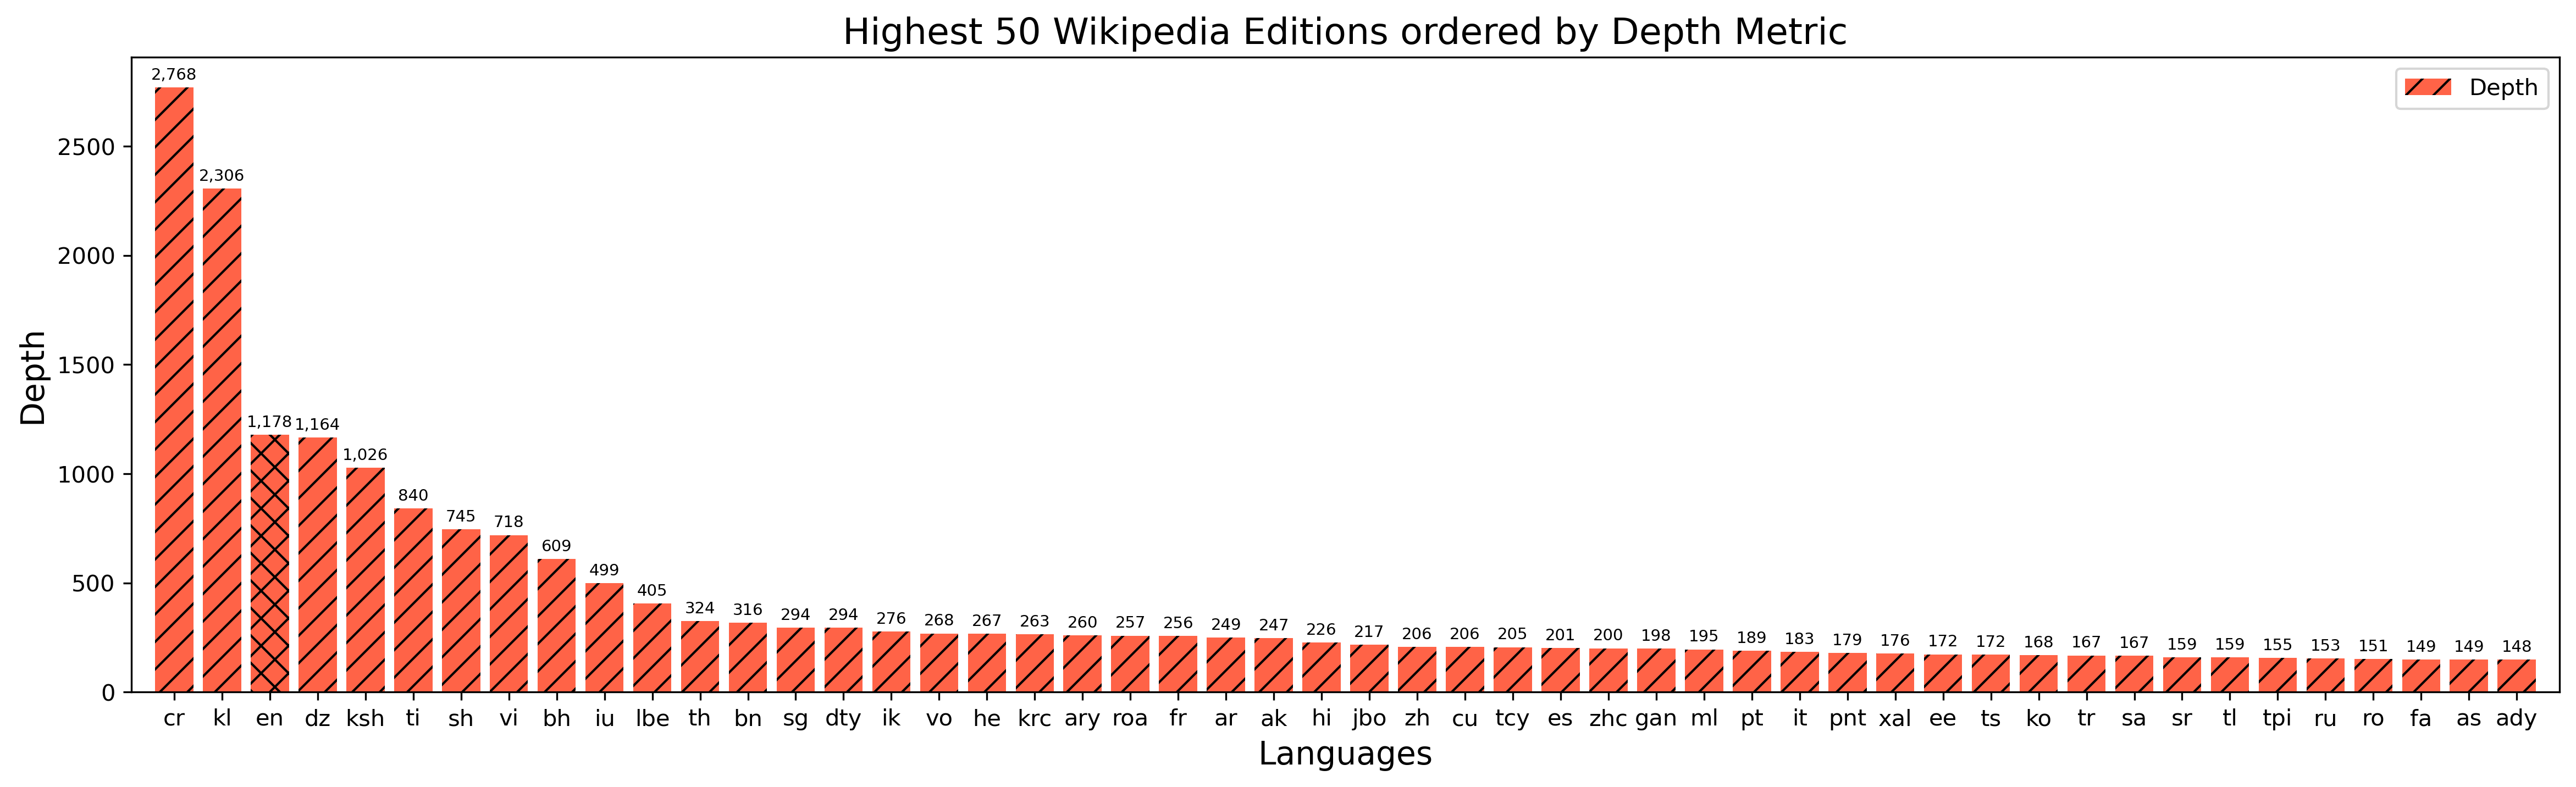

In [7]:
from matplotlib import pyplot as plt

depths = pd.read_csv('all_depth.csv')
depths = depths[['Language', 'Wiki', 'Depth']]

depths.iat[20, 1] = 'roa' # Aromanian --> roa-rup --> roa
depths.iat[30, 1] = 'zhc' # Classical Chinese --> zh-classical  --> zhc


fig = plt.figure(figsize=(19, 5), dpi=300)


plt.title("Highest 50 Wikipedia Editions ordered by Depth Metric", size=16)
plt.ylabel("Depth", size=14)
plt.xlabel("Languages", size=14)


b1 = plt.bar(depths['Wiki'].head(50), depths['Depth'].head(50), color="tomato", hatch='//')

b1[2].set_hatch('xx')

for idx in range(len(depths['Depth'].head(50))):
    plt.text(idx, depths['Depth'][idx]+58, f"{format(int(depths['Depth'][idx]), ',d')}" , ha='center', va='center', size=7,  color='black')

plt.legend([b1], ["Depth"], loc="upper right")
    
plt.margins(x=.01)

plt.savefig('Depth.jpg', bbox_inches='tight', dpi=300)

plt.show()

### @ Visualization of Depth Metric for top 50 Wikipedia Editions *--without bot activities*:

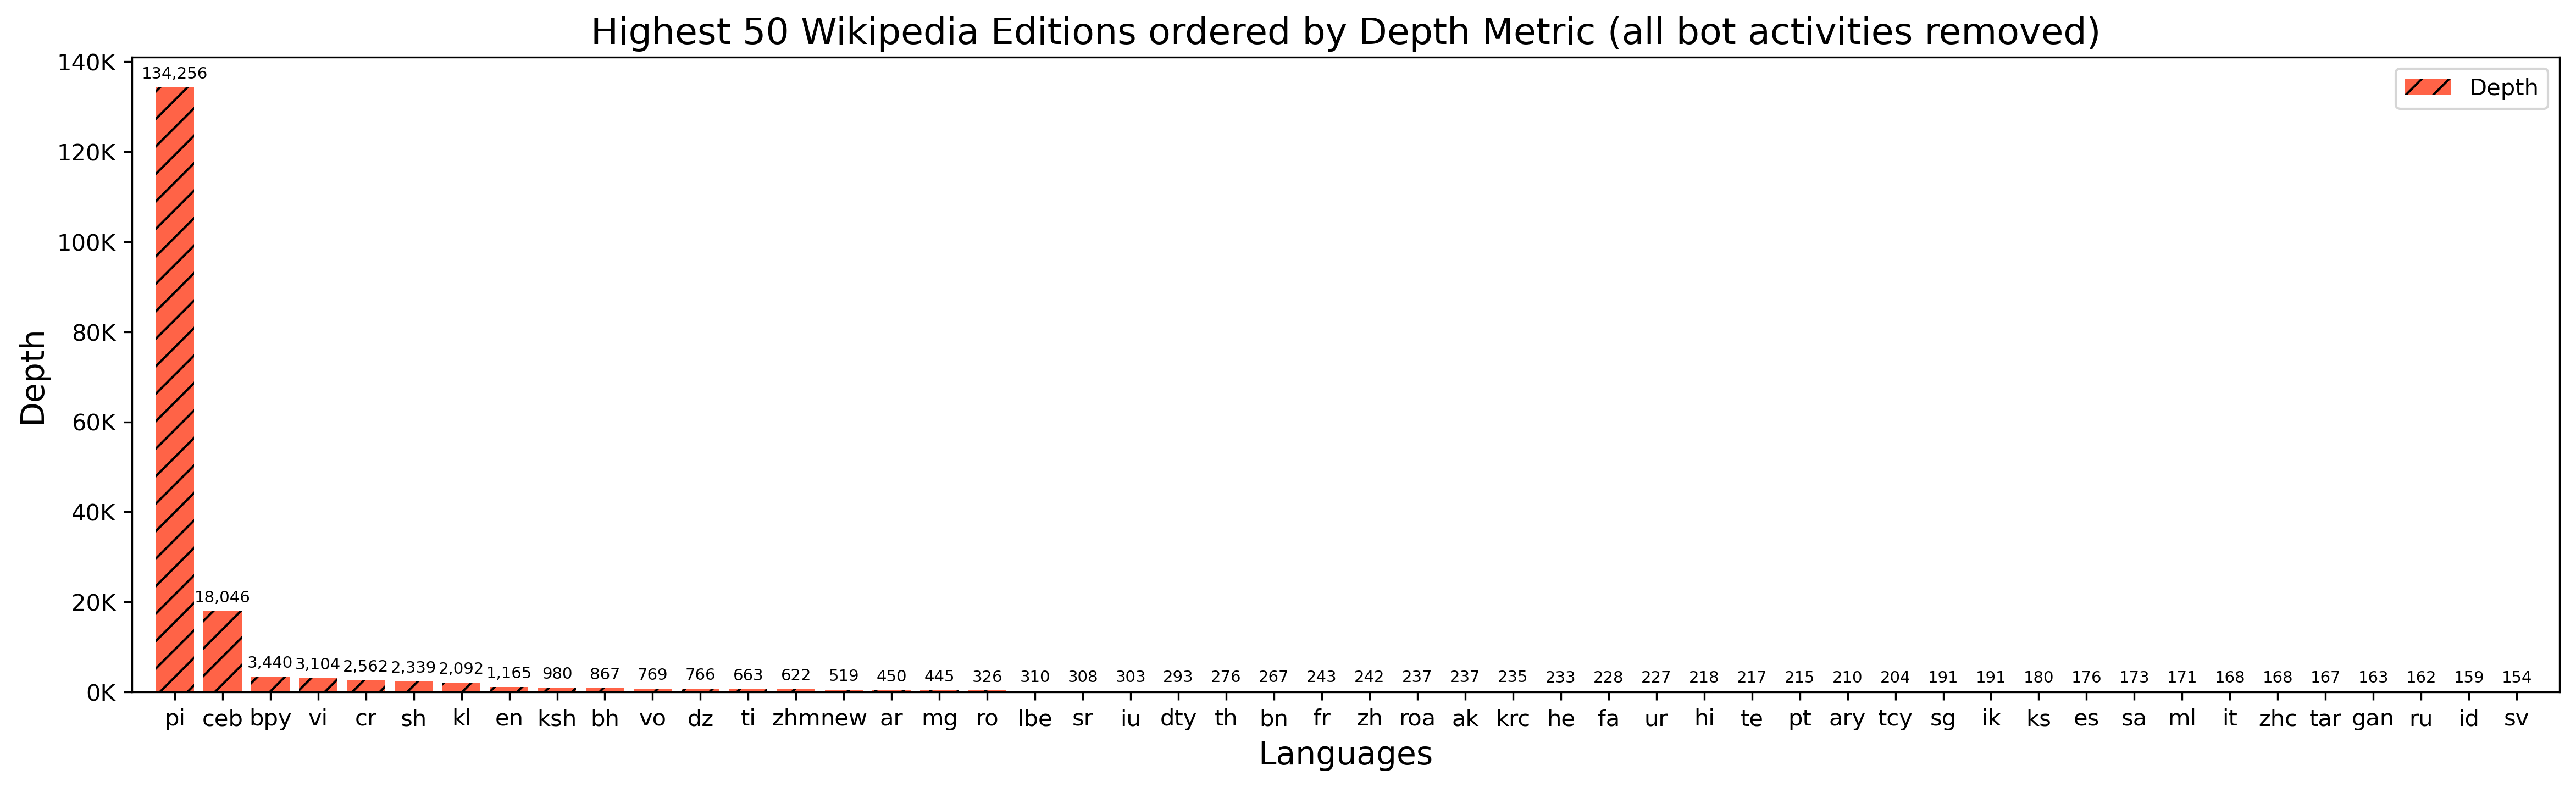

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter


depths = pd.read_csv('all_depth_noBots.csv')
depths = depths[['Language', 'Wiki', 'Depth']]


depths.iat[13, 1] = 'zhm' # Southern Min --> zh-min-nan --> zhm
depths.iat[26, 1] = 'roa' # Aromanian --> roa-rup --> roa
depths.iat[44, 1] = 'zhc' # Classical Chinese --> zh-classical  --> zhc
depths.iat[45, 1] = 'tar' # Tarantino --> roa-tara --> tar


fig = plt.figure(figsize=(19, 5), dpi=300)


plt.title("Highest 50 Wikipedia Editions ordered by Depth Metric (all bot activities removed)", size=16)
plt.ylabel("Depth", size=14)
plt.xlabel("Languages", size=14)


b1 = plt.bar(depths['Wiki'].head(50), depths['Depth'].head(50), color="tomato", hatch='//')

# b1[2].set_hatch('xx')

for idx in range(len(depths['Depth'].head(50))):
    plt.text(idx, depths['Depth'][idx]+3000, f"{format(int(depths['Depth'][idx]), ',d')}" , ha='center', va='center', size=7,  color='black')

def thousands_formatter(x, pos): return f'{int(x/1000)}K'
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend([b1], ["Depth"], loc="upper right")
    
plt.margins(x=.01)

plt.savefig('Depth_noBots.jpg', bbox_inches='tight', dpi=300)

plt.show()

### @ Visualization of DEPTH+ Metric for top 50 Wikipedia Editions *--with bot activities*:

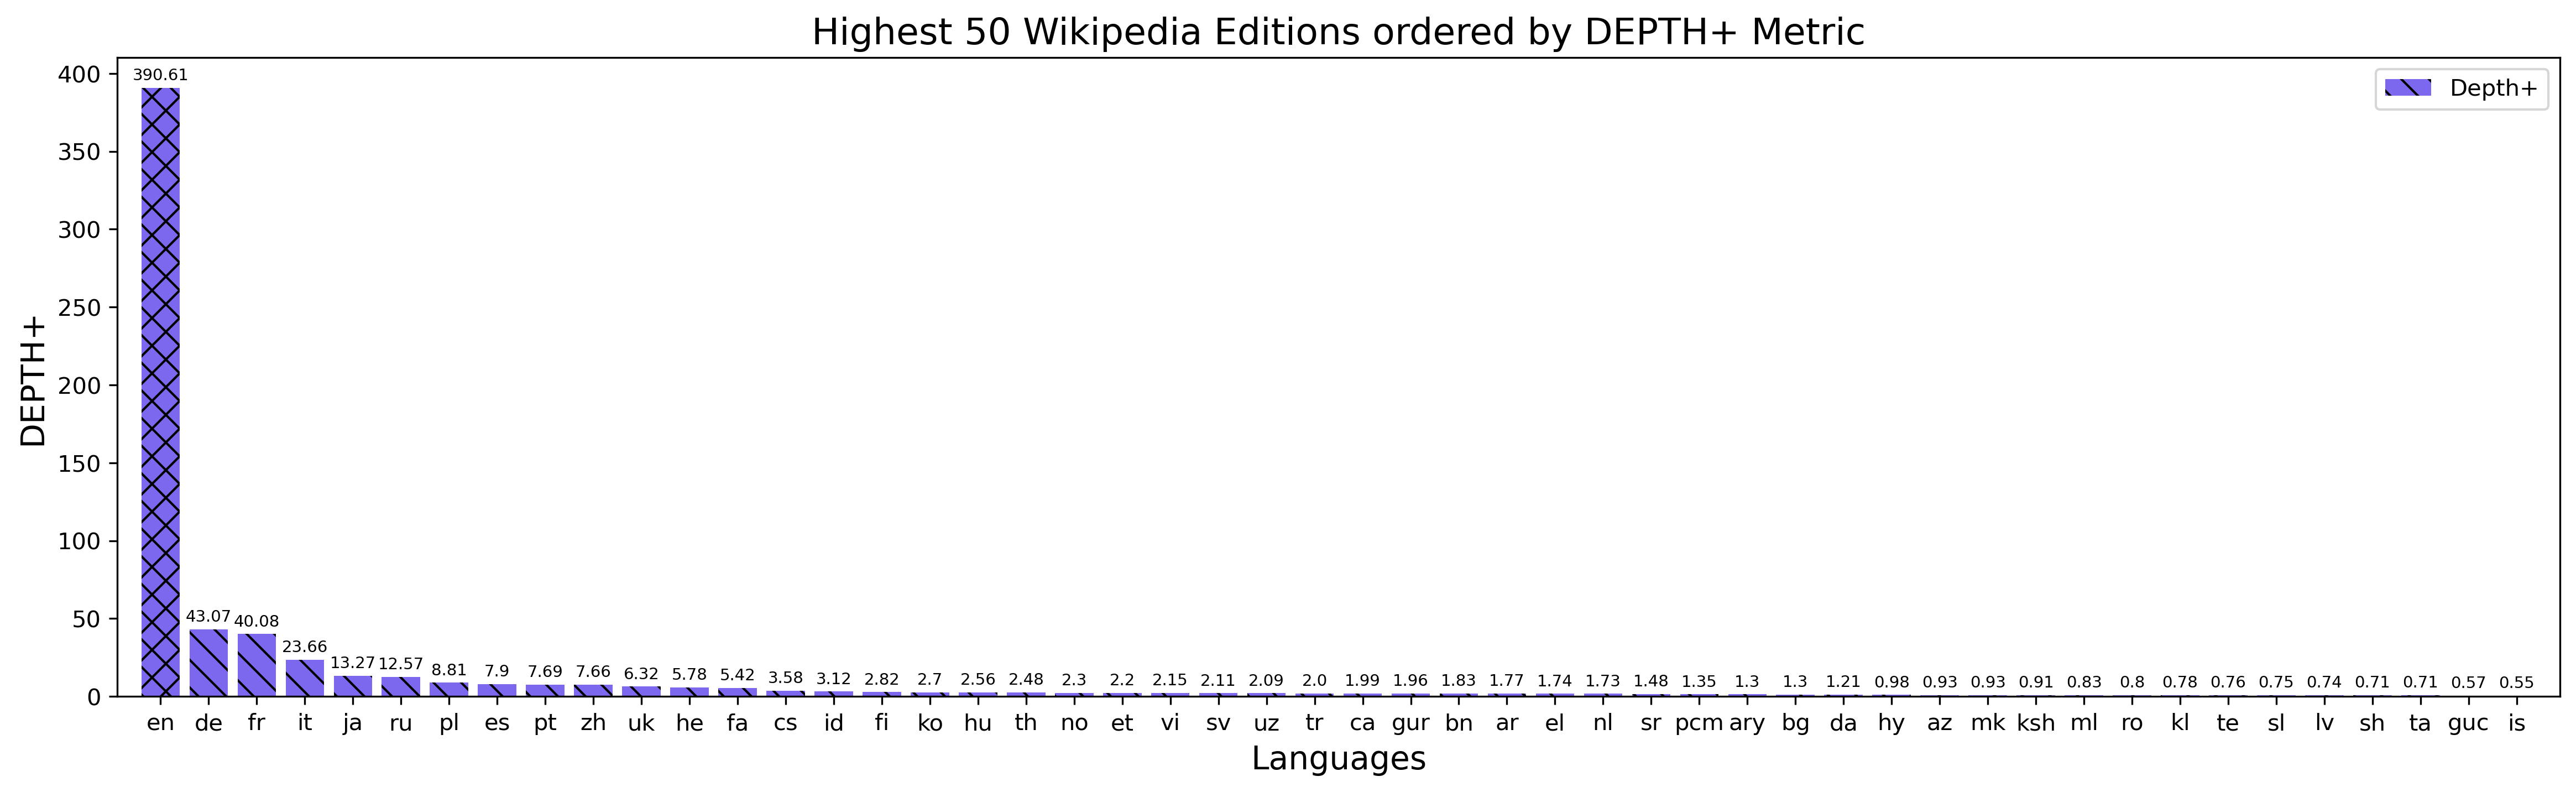

In [9]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


depthspls = pd.read_csv('all_depth+.csv')
depthspls = depthspls[['Language', 'Wiki', 'Depth+']]


fig = plt.figure(figsize=(19, 5), dpi=300)


plt.title("Highest 50 Wikipedia Editions ordered by DEPTH+ Metric", size=16)
plt.ylabel("DEPTH+", size=14)
plt.xlabel("Languages", size=14)


b1 = plt.bar(depthspls['Wiki'].head(50), depthspls['Depth+'].head(50), color="mediumslateblue", hatch='\\\\')

b1[0].set_hatch('xx')

for idx in range(len(depthspls['Depth+'].head(50))):
    plt.text(idx, depthspls['Depth+'][idx]+8, f"{round(depthspls['Depth+'][idx],2)}" , ha='center', va='center', size=7,  color='black')


colors = ['mediumslateblue']

lgd1 = mpatches.Patch(facecolor=colors[0], hatch='\\\\')

plt.legend([lgd1], ["Depth+"], loc="upper right")

plt.margins(x=.01)

plt.savefig('Depth+.jpg', bbox_inches='tight', dpi=300)

plt.show()

### @ Visualization of DEPTH+ Metric for top 50 Wikipedia Editions *--without bot activities*:

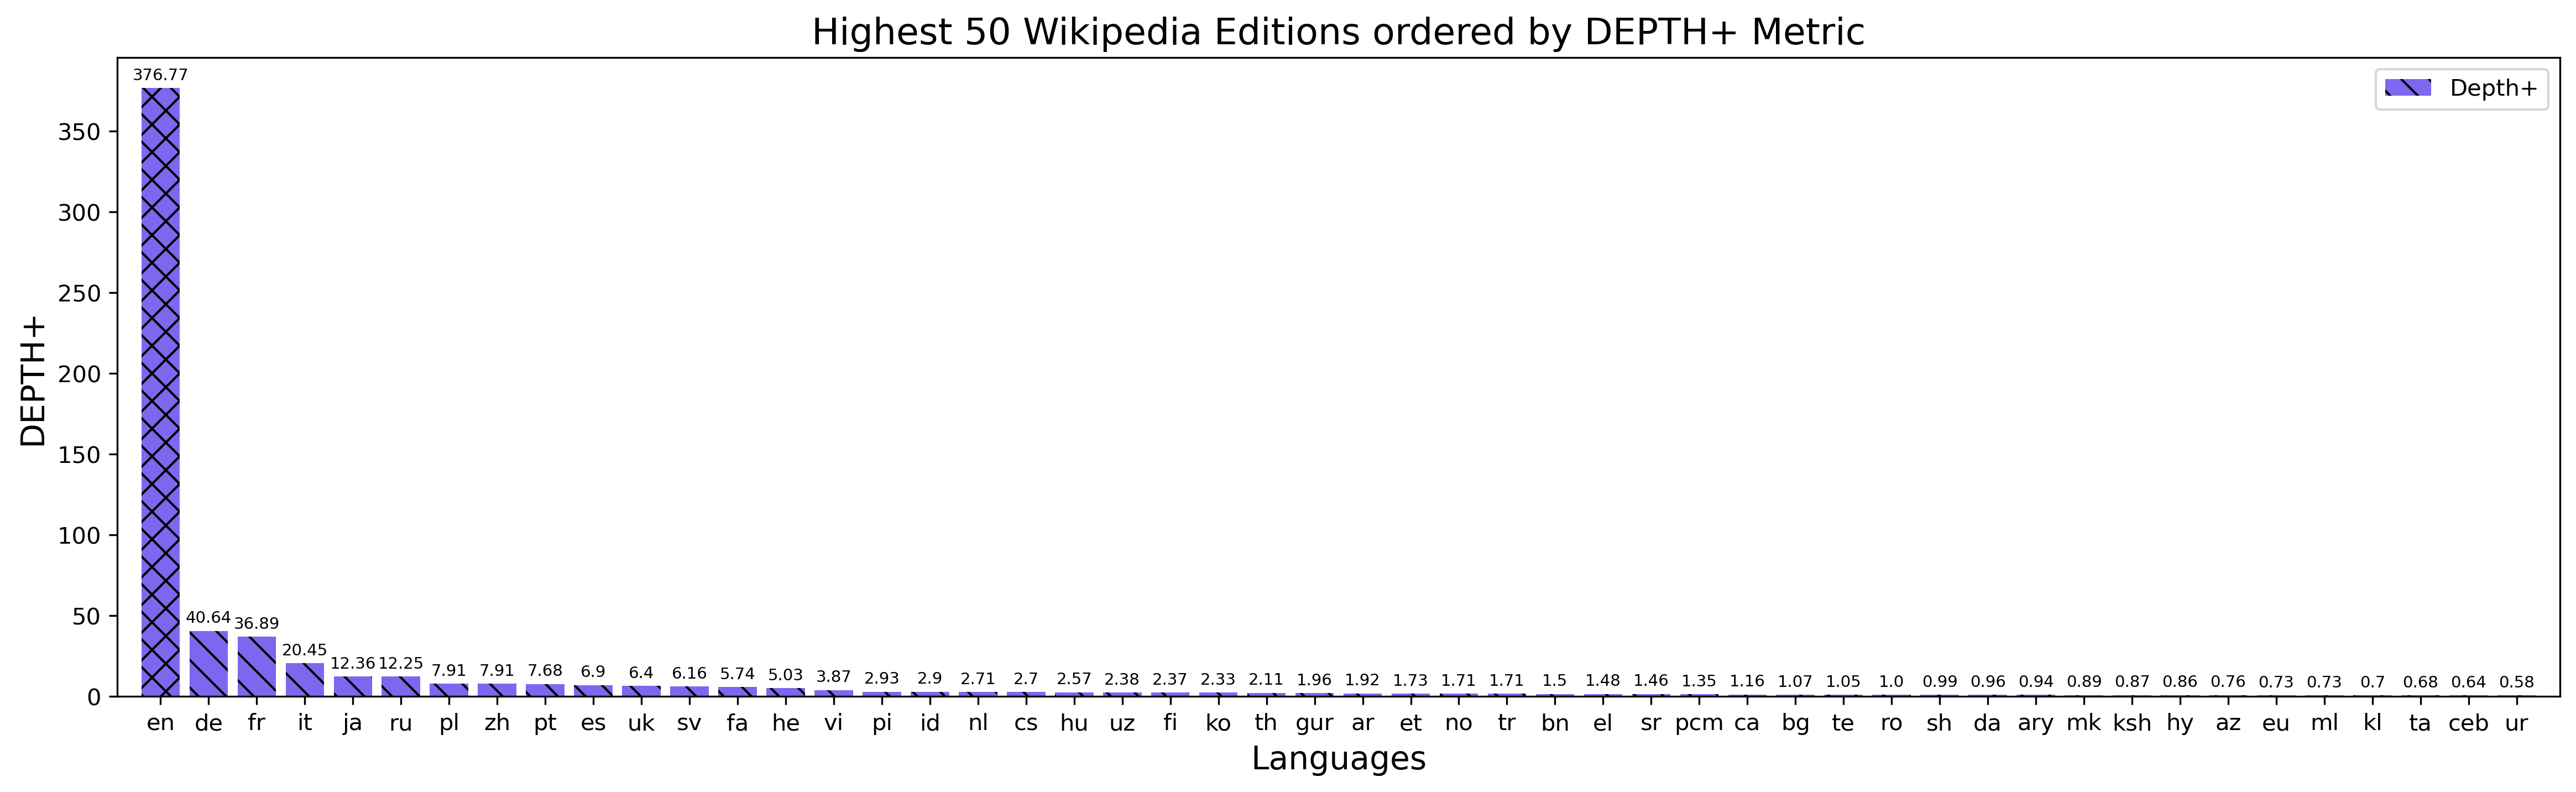

In [10]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


depthspls = pd.read_csv('all_depth+_noBots.csv')
depthspls = depthspls[['Language', 'Wiki', 'Depth+']]


fig = plt.figure(figsize=(19, 5), dpi=300)


plt.title("Highest 50 Wikipedia Editions ordered by DEPTH+ Metric", size=16)
plt.ylabel("DEPTH+", size=14)
plt.xlabel("Languages", size=14)


b1 = plt.bar(depthspls['Wiki'].head(50), depthspls['Depth+'].head(50), color="mediumslateblue", hatch='\\\\')

b1[0].set_hatch('xx')

for idx in range(len(depthspls['Depth+'].head(50))):
    plt.text(idx, depthspls['Depth+'][idx]+8, f"{round(depthspls['Depth+'][idx],2)}" , ha='center', va='center', size=7,  color='black')


colors = ['mediumslateblue']

lgd1 = mpatches.Patch(facecolor=colors[0], hatch='\\\\')

plt.legend([lgd1], ["Depth+"], loc="upper right")

plt.margins(x=.01)

plt.savefig('Depth+_noBots.jpg', bbox_inches='tight', dpi=300)

plt.show()